In [1]:
import pandas as pd
from darts import TimeSeries

In [2]:
# Read a pandas DataFrame
#df = pd.read_csv("C:\jintu\Formated data_resampled 1H ID1\six months.csv")
# df = pd.read_csv("C:\jintu\Formated data_resampled 15T ID1\ID1 May 2023.csv")
df = pd.read_csv("MY3_May_2023_KNN_Imputed.csv")

df

,Datetime,id,field1,field2,field3,field4,field5,field6,field7,field8
0,2022-07-03 20:30:00,2.200000e+01,8.871990,0.000000,398.496241,3.636364,26.00000,71.000000,45.666667,55.000000
1,2022-07-03 20:45:00,6.700000e+01,3.802281,0.000000,229.323308,0.000000,25.00000,62.000000,44.666667,53.333333
2,2022-07-03 21:00:00,1.120000e+02,12.674271,0.000000,184.210526,0.000000,25.00000,60.000000,43.666667,52.750000
3,2022-07-03 21:15:00,1.560000e+02,16.476553,0.000000,165.413534,0.000000,24.00000,59.666667,43.333333,52.666667
4,2022-07-03 21:30:00,5.307278e+05,321.540266,190.816359,794.429588,371.997558,27.25921,61.186420,18.749892,20.904609
...,...,...,...,...,...,...,...,...,...,...
28042,2023-04-21 23:00:00,1.061851e+06,397.944200,225.108225,700.960219,489.898990,29.00000,69.000000,27.666667,29.000000
28043,2023-04-21 23:15:00,1.061896e+06,392.070485,225.974026,707.818930,492.424242,29.00000,69.000000,31.666667,36.000000
28044,2023-04-21 23:30:00,1.061941e+06,393.538913,225.974026,716.049383,493.686869,29.00000,70.000000,33.333333,39.333333
28045,2023-04-21 23:45:00,1.061986e+06,392.070485,225.108225,727.023320,488.636364,29.00000,70.000000,35.333333,42.666667


In [3]:
df1 = df
df1['Datetime'] = pd.to_datetime(df['Datetime'])

df1 = df.set_index('Datetime')
#df1
df2=df1.resample('1H').mean()
df2.reset_index(inplace = True)
df2.head()

,Datetime,id,field1,field2,field3,field4,field5,field6,field7,field8
0,2022-07-03 20:00:00,44.500000,6.337136,0.000000,313.909774,1.818182,25.500000,66.500000,45.166667,54.166667
1,2022-07-03 21:00:00,265430.890775,168.057839,95.408180,484.620809,185.998779,25.879605,60.509877,31.124946,36.806471
2,2022-07-03 22:00:00,530727.781549,321.540266,190.816359,794.429588,371.997558,27.259210,61.186420,18.749892,20.904609
3,2022-07-03 23:00:00,530727.781549,321.540266,190.816359,794.429588,371.997558,27.259210,61.186420,18.749892,20.904609
4,2022-07-04 00:00:00,530727.781549,321.540266,190.816359,794.429588,371.997558,27.259210,61.186420,18.749892,20.904609


df = df.loc[(df['Datetime'] <= '2023-01-01')]

df.index = pd.to_datetime(df["Datetime"], infer_datetime_format=True)  
df

In [4]:
df = df2

target1 = 'field1'
test_l = 168
train_l = len(df) - test_l
date = 'Datetime'
# Create a TimeSeries, specifying the time and value columns
series1 = TimeSeries.from_dataframe(df, date, target1)

# Set aside the last 24 hours as a validation series
train1, val1 = series1[:train_l], series1[train_l:]

target2 = 'field2'
test_l = 168
train_l = len(df) - test_l

# Create a TimeSeries, specifying the time and value columns
series2 = TimeSeries.from_dataframe(df, date, target2)

# Set aside the last 24 hours as a validation series
train2, val2 = series2[:train_l], series2[train_l:]

target3 = 'field3'
test_l = 168
train_l = len(df) - test_l

# Create a TimeSeries, specifying the time and value columns
series3 = TimeSeries.from_dataframe(df, date, target3)

# Set aside the last 24 hours as a validation series
train3, val3 = series3[:train_l], series3[train_l:]

target4 = 'field4'
test_l = 168
train_l = len(df) - test_l

# Create a TimeSeries, specifying the time and value columns
series4 = TimeSeries.from_dataframe(df, date, target4)

# Set aside the last 24 hours as a validation series
train4, val4 = series4[:train_l], series4[train_l:]

target7 = 'field7'
test_l = 168
train_l = len(df) - test_l

# Create a TimeSeries, specifying the time and value columns
series7 = TimeSeries.from_dataframe(df, date, target7)

# Set aside the last 24 hours as a validation series
train7, val7 = series7[:train_l], series7[train_l:]

target8 = 'field8'
test_l = 168
train_l = len(df) - test_l

# Create a TimeSeries, specifying the time and value columns
series8 = TimeSeries.from_dataframe(df, date, target8)

# Set aside the last 24 hours as a validation series
train8, val8 = series8[:train_l], series8[train_l:]

Fit an exponential smoothing model, and make a (probabilistic) prediction over the validation series’ duration

from darts.models import ExponentialSmoothing
from darts.utils.utils import SeasonalityMode

modeles1 = ExponentialSmoothing(seasonal=SeasonalityMode.ADDITIVE)
modeles1.fit(train1)
predes1 = modeles1.predict(len(val1))

modeles2 = ExponentialSmoothing(seasonal=SeasonalityMode.ADDITIVE)
modeles2.fit(train2)
predes2 = modeles2.predict(len(val2))

modeles3 = ExponentialSmoothing(seasonal=SeasonalityMode.ADDITIVE)
modeles3.fit(train3)
predes3 = modeles3.predict(len(val3))

modeles4 = ExponentialSmoothing(seasonal=SeasonalityMode.ADDITIVE)
modeles4.fit(train4)
predes4 = modeles4.predict(len(val4))

modeles7 = ExponentialSmoothing(seasonal=SeasonalityMode.ADDITIVE)
modeles7.fit(train7)
predes7 = modeles7.predict(len(val7))

modeles8 = ExponentialSmoothing(seasonal=SeasonalityMode.ADDITIVE)
modeles8.fit(train8)
predes8 = modeles8.predict(len(val8))

## Exponential Smoothing MODEL

In [5]:
from darts.models import ExponentialSmoothing
from darts.utils.utils import SeasonalityMode

modeles1 = ExponentialSmoothing()
modeles1.fit(train1)
predes1 = modeles1.predict(len(val1), num_samples = 1000)

modeles2 = ExponentialSmoothing()
modeles2.fit(train2)
predes2 = modeles2.predict(len(val2), num_samples = 1000)

modeles3 = ExponentialSmoothing()
modeles3.fit(train3)
predes3 = modeles3.predict(len(val3), num_samples = 1000)

modeles4 = ExponentialSmoothing()
modeles4.fit(train4)
predes4 = modeles4.predict(len(val4), num_samples = 1000)

modeles7 = ExponentialSmoothing()
modeles7.fit(train7)
predes7 = modeles7.predict(len(val7), num_samples = 1000)

modeles8 = ExponentialSmoothing()
modeles8.fit(train8)
predes8 = modeles8.predict(len(val8), num_samples = 1000)

C:\Users\musta\anaconda3\envs\mustak\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\musta\anaconda3\envs\mustak\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\musta\anaconda3\envs\mustak\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [6]:
import pandas as pd
from darts.metrics import rmse, mae, mape

# Assuming you have defined train1, val1, train2, val2, ..., train8, val8

# Initialize lists to store the results
models = [modeles1, modeles2, modeles3, modeles4, modeles7, modeles8]
val_sets = [val1, val2, val3, val4, val7, val8]

rmse_list = []
mae_list = []
mape_list = []

# Loop through each model and its corresponding validation set
for model, val_set in zip(models, val_sets):
    predictions = model.predict(len(val_set), num_samples=1000)
    
    # Calculate evaluation metrics for the predictions
    rmse_val = rmse(predictions, val_set)
    mae_val = mae(predictions, val_set)
    mape_val = mape(predictions, val_set)
    
    # Append the results to the lists
    rmse_list.append(rmse_val)
    mae_list.append(mae_val)
    mape_list.append(mape_val)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Model': ['ExponentialSmoothing_1', 'ExponentialSmoothing_2', 'ExponentialSmoothing_3',
              'ExponentialSmoothing_4', 'ExponentialSmoothing_7', 'ExponentialSmoothing_8'],
    'RMSE': rmse_list,
    'MAE': mae_list,
    'MAPE': mape_list
})

# Save the results to a CSV file
results_df.to_csv('ExponentialSmoothing_1.csv', index=False)


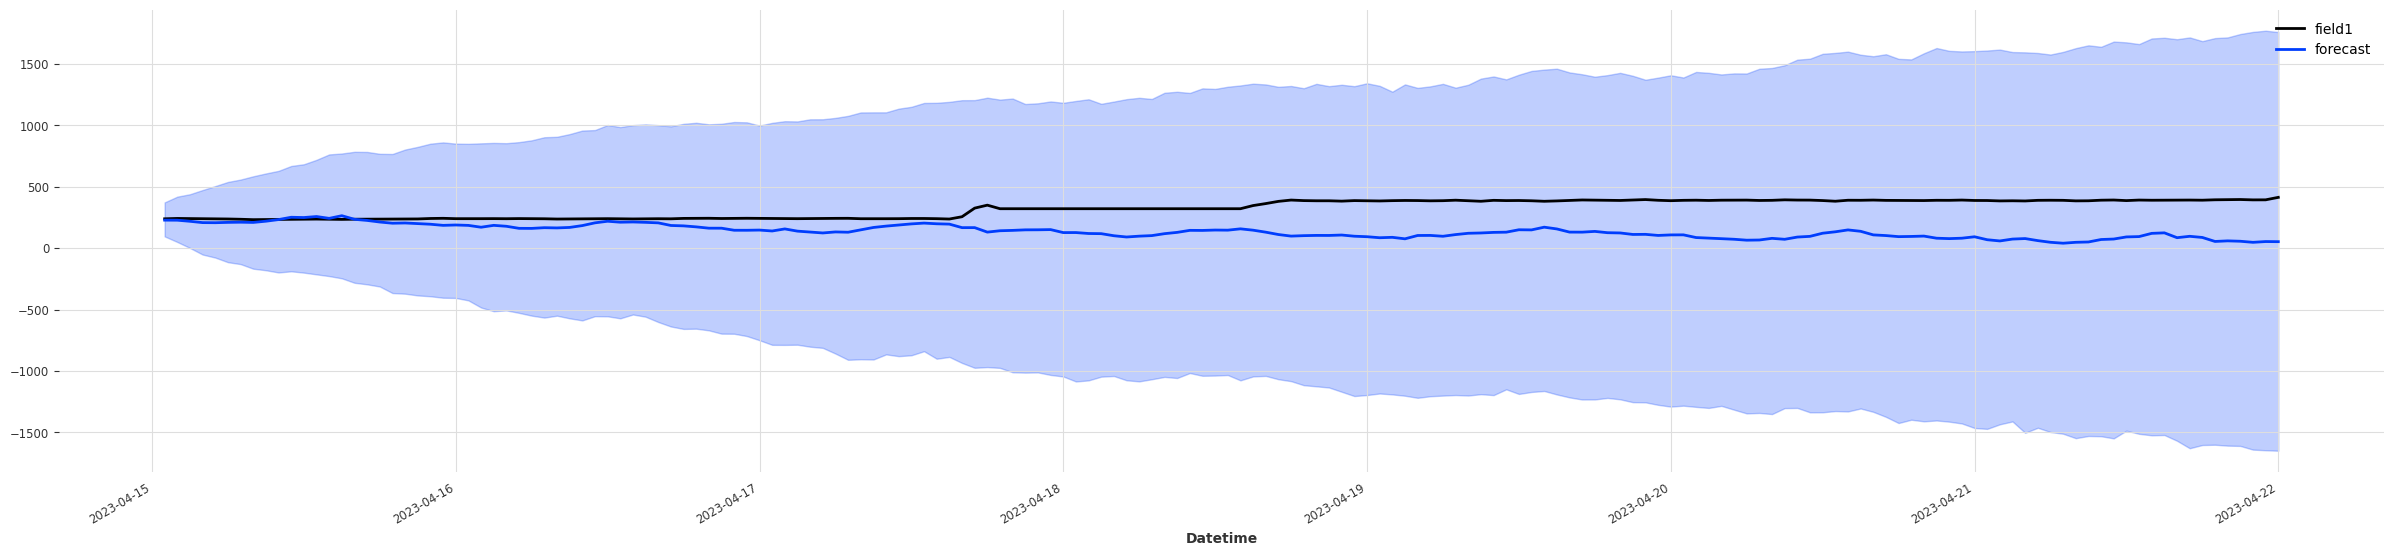

In [7]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [30, 6]
val1.plot()
predes1.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

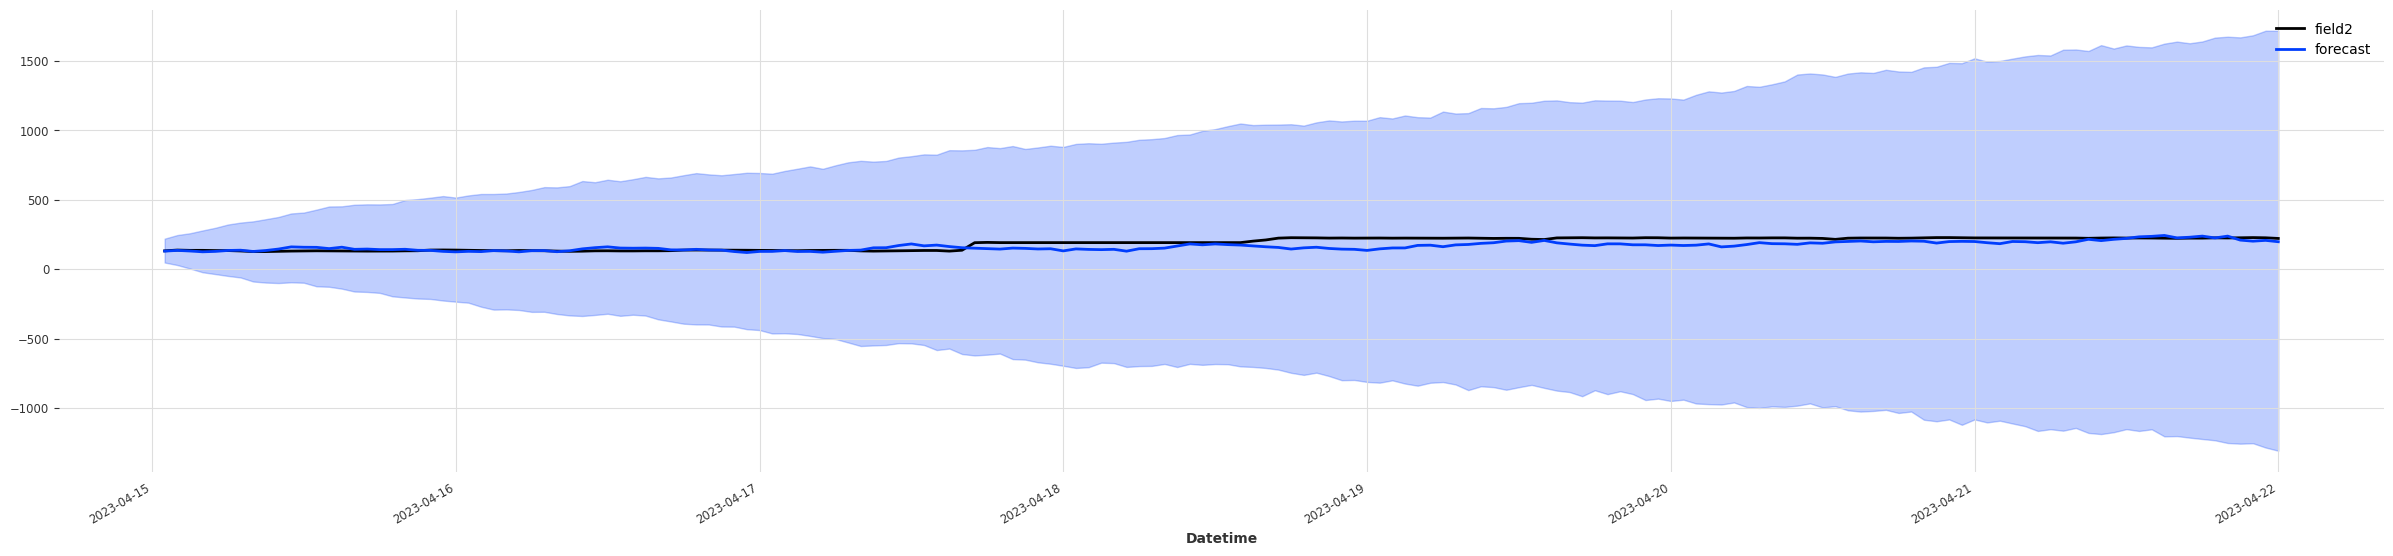

In [8]:
plt.rcParams['figure.figsize'] = [30, 6]
val2.plot()
predes2.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

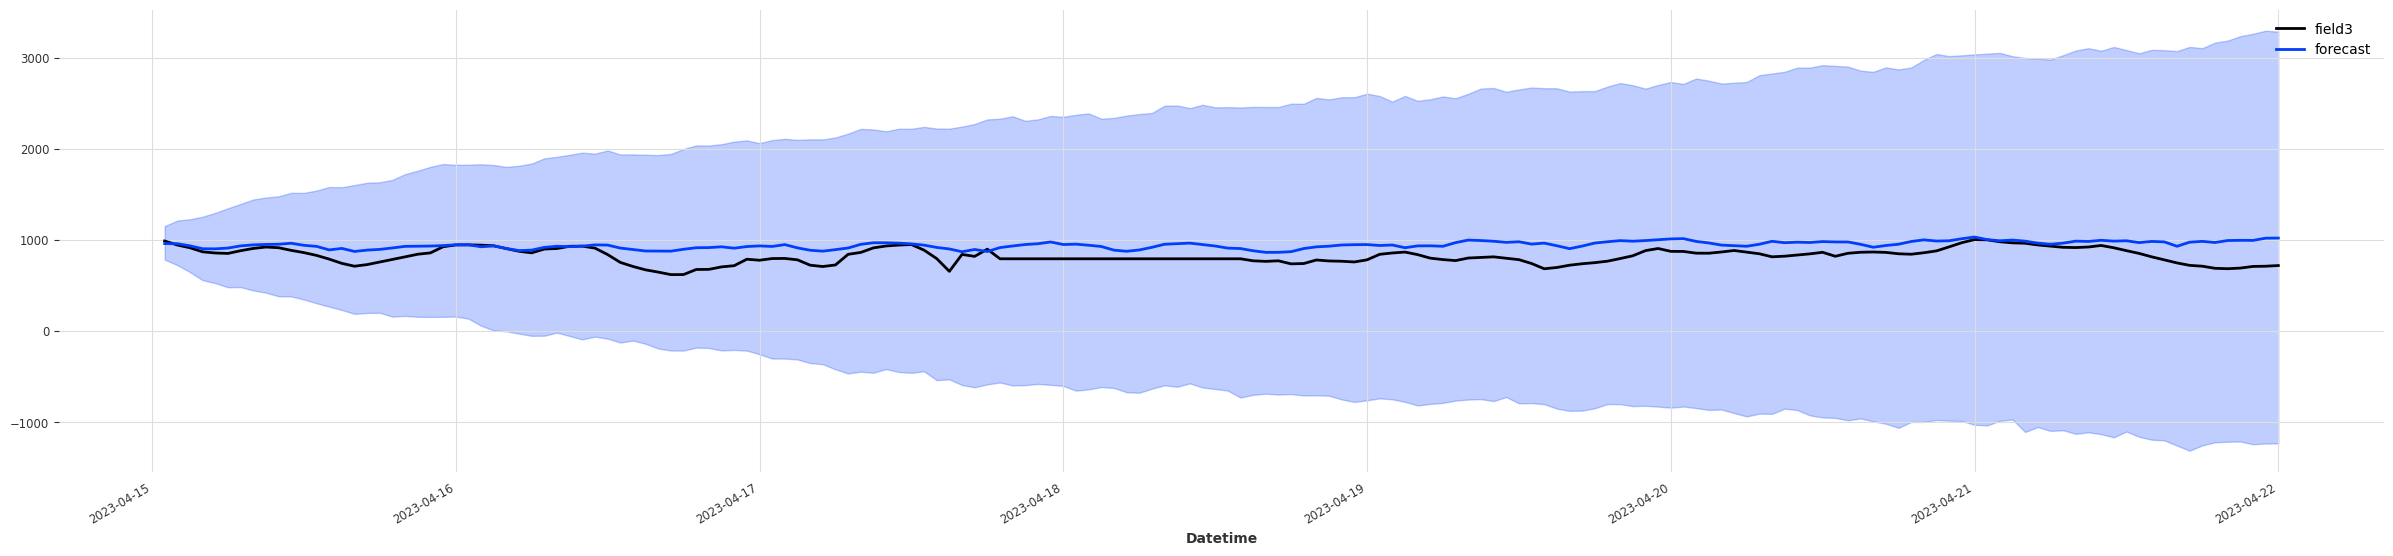

In [9]:
plt.rcParams['figure.figsize'] = [30, 6]
val3.plot()
predes3.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

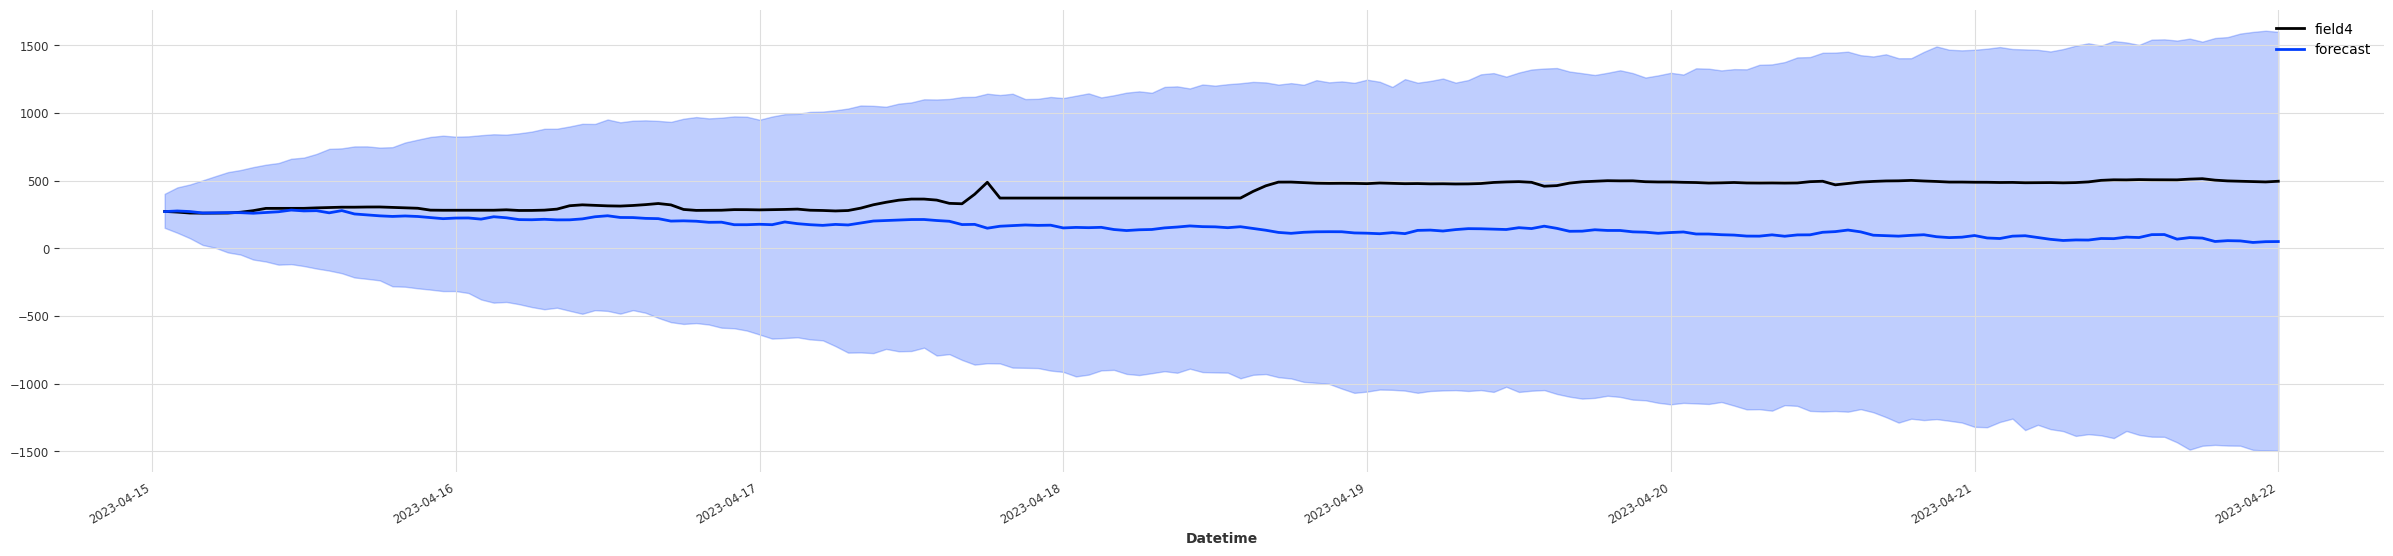

In [10]:
plt.rcParams['figure.figsize'] = [30, 6]
val4.plot()
predes4.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

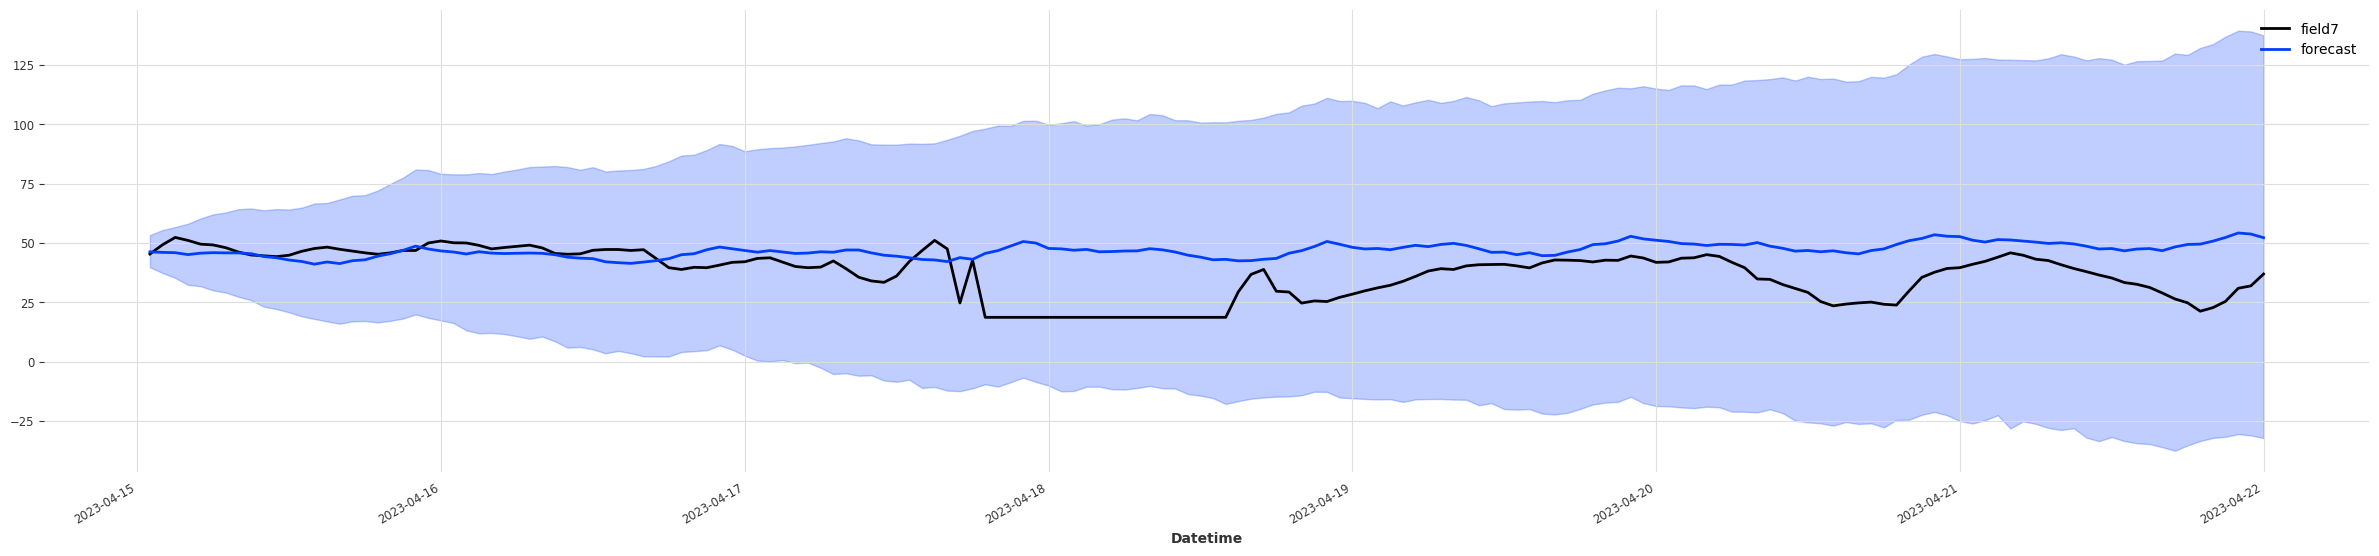

In [11]:
plt.rcParams['figure.figsize'] = [30, 6]
val7.plot()
predes7.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

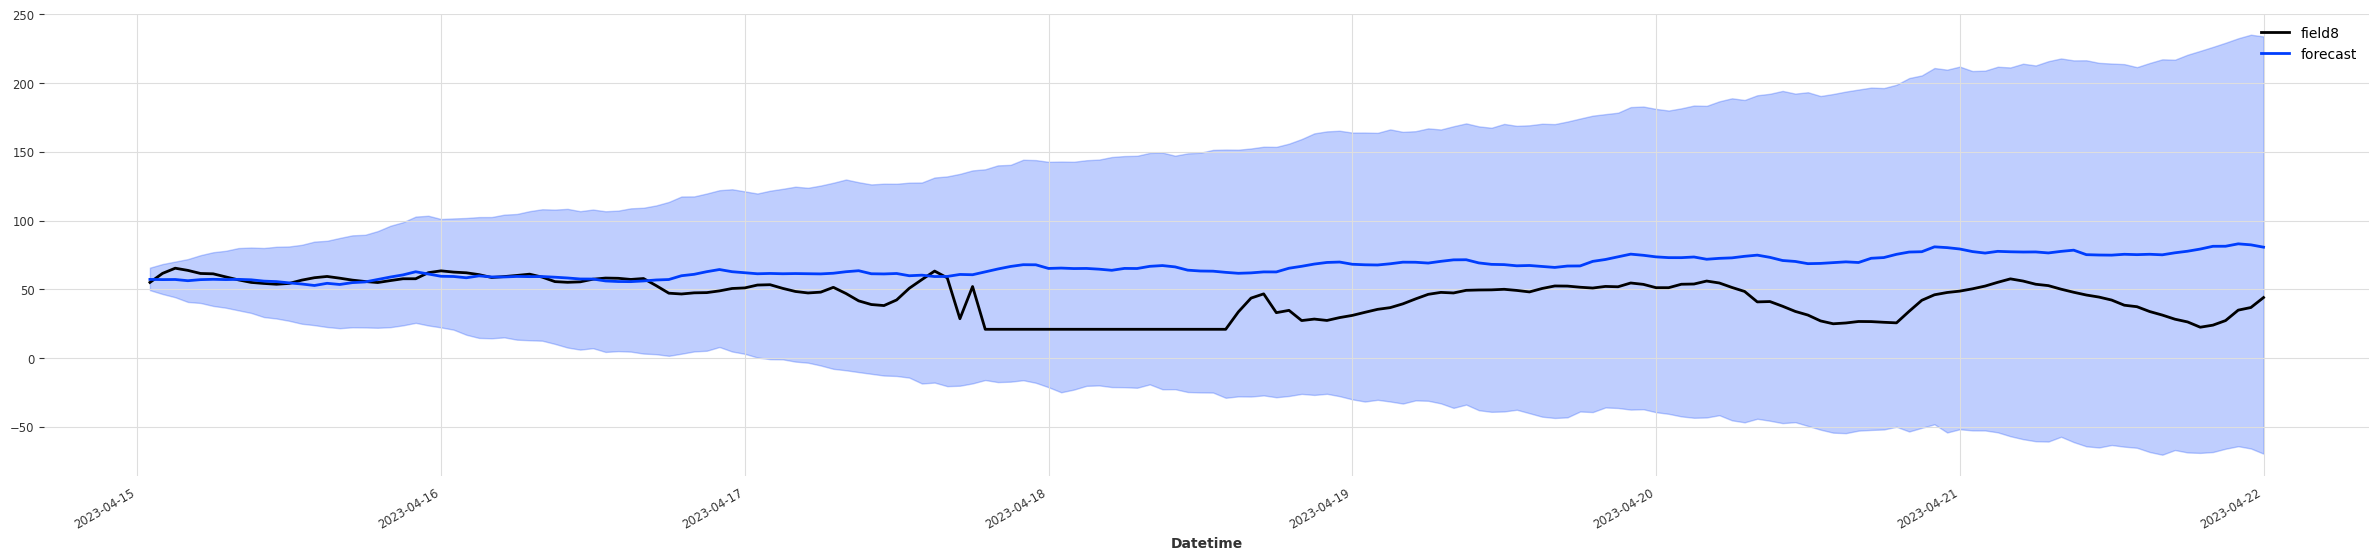

In [12]:
plt.rcParams['figure.figsize'] = [30, 6]
val8.plot()
predes8.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

target1 = ['field1','field5']

test_l = 168
train_l = len(df) - test_l

# Create a TimeSeries, specifying the time and value columns
series = TimeSeries.from_dataframe(df, "created_at", target1)

# Set aside the last 7 days as a validation series
train, val = series[:train_l], series[train_l:]

from darts.ad import KMeansScorer

scorer = KMeansScorer(k=2, window=5)
scorer.fit(train)
anom_score = scorer.score(val)

from darts.ad import QuantileDetector

detector = QuantileDetector(high_quantile=0.99)
detector.fit(scorer.score(train))
binary_anom = detector.detect(anom_score)

import matplotlib.pyplot as plt

series.plot()
(anom_score / 2. - 100).plot(label="computed anomaly score", c="orangered", lw=3)
(binary_anom * 45 - 150).plot(label="detected binary anomaly", lw=4)

## NBEATS Model

In [ ]:
# importing model
from darts.models import NBEATSModel

# creating a model object
modelnb1 = NBEATSModel(input_chunk_length=24 , output_chunk_length=12, n_epochs = 100 , random_state = 15)
# fitting the model
modelnb1.fit(train1, verbose = True)

# imports
#from darts.metrics import mape
prednb1 = modelnb1.predict(n = len(val1), series = train1)
#print("Mape = {:.2f}%".format(mape(train1 , prednb1)))

# creating a model object
modelnb2 = NBEATSModel(input_chunk_length=24 , output_chunk_length=12, n_epochs = 100 , random_state = 15)
modelnb2.fit(train2, verbose = True)
prednb2 = modelnb2.predict(n = len(val2), series = train2)

modelnb3 = NBEATSModel(input_chunk_length=24 , output_chunk_length=12, n_epochs = 100 , random_state = 15)
modelnb3.fit(train3, verbose = True)
prednb3 = modelnb3.predict(n = len(val3), series = train3)

modelnb4 = NBEATSModel(input_chunk_length=24 , output_chunk_length=12, n_epochs = 100 , random_state = 15)
modelnb4.fit(train4, verbose = True)
prednb4 = modelnb4.predict(n = len(val4), series = train4)

modelnb7 = NBEATSModel(input_chunk_length=24 , output_chunk_length=12, n_epochs = 100 , random_state = 15)
modelnb7.fit(train7, verbose = True)
prednb7 = modelnb7.predict(n = len(val7), series = train7)

modelnb8 = NBEATSModel(input_chunk_length=24 , output_chunk_length=12, n_epochs = 100 , random_state = 15)
modelnb8.fit(train8, verbose = True)
prednb8 = modelnb8.predict(n = len(val8), series = train8)

In [ ]:
#from sklearn.metrics import mean_absolute_error

#mean_absolute_error(val,pred)
plt.rcParams['figure.figsize'] = [30, 20]
val1.plot()
prednb1.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

In [ ]:
#from sklearn.metrics import mean_absolute_error

#mean_absolute_error(val,pred)
plt.rcParams['figure.figsize'] = [30, 20]
val2.plot()
prednb2.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

In [ ]:
#from sklearn.metrics import mean_absolute_error

#mean_absolute_error(val,pred)
plt.rcParams['figure.figsize'] = [30, 20]
val3.plot()
prednb3.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

In [ ]:
#from sklearn.metrics import mean_absolute_error

#mean_absolute_error(val,pred)
plt.rcParams['figure.figsize'] = [30, 20]
val4.plot()
prednb4.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

In [ ]:
#from sklearn.metrics import mean_absolute_error

#mean_absolute_error(val,pred)
plt.rcParams['figure.figsize'] = [30, 20]
val7.plot()
prednb7.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

In [ ]:
#from sklearn.metrics import mean_absolute_error

#mean_absolute_error(val,pred)
plt.rcParams['figure.figsize'] = [30, 20]
val8.plot()
prednb8.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

## LightGBM Model

In [ ]:
# importing model
from darts.models import LightGBMModel

# creating a model object
modelgbm1 = LightGBMModel(lags=96, output_chunk_length=24)
# fitting the model
modelgbm1.fit(train1)

# imports
predgbm1 = modelgbm1.predict(n = len(val1), series = train1)
#print("Mape = {:.2f}%".format(mape(train , pred)))


modelgbm2 = LightGBMModel(lags=96, output_chunk_length=24)
modelgbm2.fit(train2)
predgbm2 = modelgbm2.predict(n = len(val2), series = train2)

modelgbm3 = LightGBMModel(lags=96, output_chunk_length=24)
modelgbm3.fit(train3)
predgbm3 = modelgbm3.predict(n = len(val3), series = train3)

modelgbm4 = LightGBMModel(lags=96, output_chunk_length=24)
modelgbm4.fit(train4)
predgbm4 = modelgbm4.predict(n = len(val4), series = train4)

modelgbm7 = LightGBMModel(lags=96, output_chunk_length=24)
modelgbm7.fit(train7)
predgbm7 = modelgbm7.predict(n = len(val7), series = train7)

modelgbm8 = LightGBMModel(lags=96, output_chunk_length=24)
modelgbm8.fit(train8)
predgbm8 = modelgbm8.predict(n = len(val8), series = train8)

In [ ]:
#from sklearn.metrics import mean_absolute_error

#mean_absolute_error(val,pred)
plt.rcParams['figure.figsize'] = [30, 20]
val1.plot()
predgbm1.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = [30, 20]
val2.plot()
predgbm2.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = [30, 20]
val3.plot()
predgbm3.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = [30, 20]
val4.plot()
predgbm4.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = [30, 20]
val7.plot()
predgbm7.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = [30, 20]
val8.plot()
predgbm8.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

## RANDOM FOREST

In [ ]:
from darts.models import RandomForest
n = len(val1)


modelrf1 = RandomForest(lags=96, output_chunk_length=96, n_estimators = 200, max_depth = None, multi_models = True)
modelrf1.fit(train1)
predrf1 = modelrf1.predict(n, train1)

modelrf2 = RandomForest(lags=96, output_chunk_length=96, n_estimators = 200, max_depth = None, multi_models = True)
modelrf2.fit(train2)
predrf2 = modelrf2.predict(n, train2)

modelrf3 = RandomForest(lags=96, output_chunk_length=96, n_estimators = 200, max_depth = None, multi_models = True)
modelrf3.fit(train3)
predrf3 = modelrf3.predict(n, train3)

modelrf4 = RandomForest(lags=96, output_chunk_length=96, n_estimators = 200, max_depth = None, multi_models = True)
modelrf4.fit(train4)
predrf4 = modelrf4.predict(n, train4)

modelrf7 = RandomForest(lags=96, output_chunk_length=96, n_estimators = 200, max_depth = None, multi_models = True)
modelrf7.fit(train7)
predrf7 = modelrf7.predict(n, train7)

modelrf8 = RandomForest(lags=96, output_chunk_length=96, n_estimators = 200, max_depth = None, multi_models = True)
modelrf8.fit(train8)
predrf8 = modelrf8.predict(n, train8)

In [ ]:
plt.rcParams['figure.figsize'] = [30, 20]
val1.plot()
predrf1.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = [30, 20]
val2.plot()
predrf2.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = [30, 20]
val3.plot()
predrf3.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = [30, 20]
val4.plot()
predrf4.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = [30, 20]
val7.plot()
predrf7.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = [30, 20]
val8.plot()
predrf8.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

##  RNN Model

In [ ]:
from darts.models import RNNModel

modelrnn1 = RNNModel(input_chunk_length = 96, model = 'RNN', hidden_dim = 64, n_rnn_layers = 4, dropout = 0.0)
modelrnn1.fit(train1)
predrnn1 = modelrnn1.predict(n, train1)

modelrnn2 = RNNModel(input_chunk_length = 96, model = 'RNN', hidden_dim = 64, n_rnn_layers = 4, dropout = 0.0)
modelrnn2.fit(train2)
predrnn2 = modelrnn2.predict(n, train2)

modelrnn3 = RNNModel(input_chunk_length = 96, model = 'RNN', hidden_dim = 64, n_rnn_layers = 4, dropout = 0.0)
modelrnn3.fit(train3)
predrnn3 = modelrnn3.predict(n, train3)

modelrnn4 = RNNModel(input_chunk_length = 96, model = 'RNN', hidden_dim = 64, n_rnn_layers = 4, dropout = 0.0)
modelrnn4.fit(train4)
predrnn4 = modelrnn4.predict(n, train4)

modelrnn7 = RNNModel(input_chunk_length = 96, model = 'RNN', hidden_dim = 64, n_rnn_layers = 4, dropout = 0.0)
modelrnn7.fit(train7)
predrnn7 = modelrnn7.predict(n, train7)

modelrnn8 = RNNModel(input_chunk_length = 96, model = 'RNN', hidden_dim = 64, n_rnn_layers = 4, dropout = 0.0)
modelrnn8.fit(train8)
predrnn8 = modelrnn8.predict(n, train8)

In [ ]:
plt.rcParams['figure.figsize'] = [30, 20]
val1.plot()
predrnn1.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = [30, 20]
val2.plot()
predrnn2.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = [30, 20]
val3.plot()
predrnn3.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = [30, 20]
val4.plot()
predrnn4.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = [30, 20]
val7.plot()
predrnn7.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

In [ ]:
plt.rcParams['figure.figsize'] = [30, 20]
val8.plot()
predrnn8.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()